# Capstone Data Report

# 1. Data Wrangling

+ Importing the necessary libraries.
+ Listing dataset files and loading datasets
+ Missing data analysis
+ Merging datasets into one dataset


# 2. Data Story Telling

+ Data Exploration and visualization of each data.
+ Questions:
    + Is there difference in acceptance of application given loan type (cash vs revolving)?
    + xxx
    + xxx
    + xxx
    + xxx
****

+ Data source: https://www.kaggle.com/c/home-credit-default-risk/dataAll 



# 1. Data Wrangling

**1. Importing the necessary libraries**

In [5]:
# importing numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# importing matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
# File system manangement
import os

**2. Listing dataset files and loading them**

In [6]:
# Listing data files 
print(os.listdir("../Capstone/Dataset/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


**Loading datasets as:**
+ application_train.csv into dataframe app_train
+ application_test.csv into dataframe app_test
+ bureau.csv into into dataframe bureau
+ bureau_balance.csv into dataframe bureau_balance
+ POS_CASH_balance.csv into dataframe POS_CASH_balance
+ credit_card_balance.csv into dataframe credit_card_balance
+ previous_application.csv into dataframe previous_application
+ installments_payments.csv into dataframe installments_payments

In [7]:
app_train = pd.read_csv('../Capstone/Dataset/application_train.csv')
app_test = pd.read_csv('../Capstone/Dataset/application_test.csv')
bureau = pd.read_csv('../Capstone/Dataset/bureau.csv')
bureau_balance = pd.read_csv('../Capstone/Dataset/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('../Capstone/Dataset/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('../Capstone/Dataset/credit_card_balance.csv')
previous_application = pd.read_csv('../Capstone/Dataset/previous_application.csv')
installments_payments = pd.read_csv('../Capstone/Dataset/installments_payments.csv')

**Looking at the information in datasets:**
+ Number of variables, variable names, number of observations in the loaded datasets


+ **Starting with trainning dataset:**

In [8]:
# Feautes of training data

print('Training data shape:', app_train.shape)

Training data shape: (307511, 122)


In [9]:
# Exploring first rows of the data
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Getting all the columns of training data
app_train.columns.values.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

+ **Let us now look at the same features of testing dataset:**

In [11]:
# Testing data features
app_test.shape
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Hence, the test dataset has 121 variables, missing the Target column and the number of observations less compared to train dataset.

+ **Let us also look at the other datafiles that has information about features of the applicants**

In [12]:
print('Size of bureau data', bureau.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)

Size of bureau data (1716428, 17)
Size of bureau_balance data (27299925, 3)
Size of POS_CASH_balance data (10001358, 8)
Size of credit_card_balance data (3840312, 23)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)


In [13]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [14]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [15]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [16]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [17]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**3. Missing Data Analysis**

+ **Let us start with identify and calculating missing values in training data:**

In [19]:
# Function to calculate missing values in training data 
total = app_train.isnull().sum().sort_values(ascending = False)
percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending = False)
missing_app_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_app_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


+ **Let us do similar missing value analysis in other datasets:**

In [20]:
# checking missing data in bureau
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in bureau:")
missing_bureau_data.head()

Missing data in bureau:


,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932


In [21]:
# checking missing data in bureau_balance
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in bureau_balance:")
missing_bureau_balance_data.head()

Missing data in bureau_balance:


,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [22]:
# checking missing data in POS_CASH_balance
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in  POS_CASH_balance:")
missing_POS_CASH_balance_data.head()

Missing data in  POS_CASH_balance:


,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000


In [23]:
# checking missing data credit_card_balance
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in credit_card_balance:")
missing_credit_card_balance_data.head()

Missing data in credit_card_balance:


,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872


In [24]:
# checking missing data previous_application
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in previous_application:")
missing_previous_application_data.head()

Missing data in previous_application:


,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754


In [25]:
# checking missing data installments_payments
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in installments_payments:")
missing_installments_payments_data.head()

Missing data in installments_payments:


,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000


**4. Merging datasets:**

+ First, Let us seperate dataframes from bureau based on CREDIT_ACTIVE column: 

    There will be four types: active, closed, sold and bad debt namely: active_bureau_credit, closed_bureau_credit, sold_bureau_credit and bad_debt_bureau_credit, respectively . The number of each type for each idea will be calculated.
    
    
+ Next, we merge active_bureau_credit, closed_bureau_credit, sold_bureau_credit and bad_debt_bureau_credit by using joıint field SK_ID_CURR. We name new combined dataframe app_bureau_train.


+ We apply the same steps to the test data and  create a new dataframe app_bureau_test.


+ Next, we seperate dataframes from previous_application based on contract type (NAME_CONTRACT_TYPE olumn)

In [26]:
# Checking all the types of CREDIT_ACTIVE
bureau['CREDIT_ACTIVE'].unique()

# counting of all the types of CREDIT_ACTIVE
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [27]:
# Geting summary of all the Active credit details
active_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Active'].groupby(['SK_ID_CURR'], as_index=False).sum()
active_bureau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,17689905,-928,0,3091.0,0.0,0.0,0,884025.000,596686.5,0.000,0.0,-32,24817.5
1,100002,12317812,-1145,0,780.0,0.0,40.5,0,481988.565,245781.0,31988.565,0.0,-31,0.0
2,100003,5885880,-606,0,1216.0,0.0,0.0,0,810000.000,0.0,810000.000,0.0,-43,0.0
3,100005,13470403,-199,0,1446.0,0.0,0.0,0,598626.000,568408.5,0.000,0.0,-42,4261.5
4,100008,6491434,-78,0,471.0,0.0,0.0,0,267606.000,240057.0,0.000,0.0,-16,0.0


In [28]:
np.max(active_bureau_credit['CNT_CREDIT_PROLONG'])


9

In [29]:
np.min(active_bureau_credit['DAYS_CREDIT_ENDDATE'])

-83445.0

In [30]:
np.min(active_bureau_credit['DAYS_ENDDATE_FACT'])

-8664.0

In [31]:
# Getting summary of all the Closed credit details
closed_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Closed'].groupby(['SK_ID_CURR'], as_index=False).sum()
closed_bureau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,23586526,-4217,0,-2514.0,-3302.0,0.000,0,569340.0,0.0,0.0,0.0,-620,0.0
1,100002,36908365,-5847,0,-2874.0,-4185.0,8364.645,0,383067.0,0.0,0.0,0.0,-3968,0.0
2,100003,17657634,-4997,0,-3394.0,-3292.0,0.000,0,207400.5,0.0,0.0,0.0,-3221,0.0
3,100004,13658267,-1734,0,-977.0,-1065.0,0.000,0,189037.8,0.0,0.0,0.0,-1064,0.0
4,100005,6735200,-373,0,-128.0,-123.0,0.000,0,58500.0,0.0,0.0,0.0,-121,0.0


In [32]:
np.max(closed_bureau_credit['CNT_CREDIT_PROLONG'])

6

In [33]:
# Getting summary of all the Sold credit details
sold_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Sold'].groupby(['SK_ID_CURR'], as_index=False).sum()
sold_bureau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100039,5153449,-1206,0,-980.0,0.0,0.0,0,945000.0,0.0,0.0,0.0,-109,0.00
1,100128,5941041,-2641,0,-1987.0,0.0,0.0,0,1003500.0,0.0,0.0,0.0,-1984,0.00
2,100162,6131361,-1998,0,-1272.0,0.0,0.0,0,82768.5,0.0,0.0,0.0,-1998,14882.85
3,100170,5915577,-147,0,0.0,0.0,0.0,0,13500.0,13770.0,0.0,0.0,-105,16200.00
4,100201,5928807,-2270,0,-1907.0,0.0,0.0,0,69898.5,0.0,0.0,0.0,-2154,0.00


In [34]:
np.max(sold_bureau_credit['CNT_CREDIT_PROLONG'])

1

In [35]:
# Geting summary of all the bad debt credit details
bad_debt_bureau_credit = bureau[bureau.CREDIT_ACTIVE=='Bad debt'].groupby(['SK_ID_CURR'], as_index=False).sum()
bad_debt_bureau_credit.head(10)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,158069,6039562,-1683,366,-862.0,0.0,0.000,0,528165.00,0.000,0.000,503392.5,-1217,0.0
1,163442,5997537,-1502,366,-1292.0,0.0,0.000,0,57960.00,0.000,0.000,0.0,-1292,0.0
2,176952,5326184,-2241,1135,-1876.0,0.0,39991.500,0,450000.00,0.000,0.000,42.3,-737,0.0
3,186360,5499851,-1218,366,-852.0,0.0,0.000,0,121275.00,0.000,0.000,0.0,-1035,0.0
4,207535,5300044,-2834,0,-1724.0,-642.0,197937.225,0,135000.00,182632.635,-47632.635,0.0,-642,0.0
5,231185,5173404,-2740,1761,-2558.0,0.0,2137.500,0,14296.50,7717.500,0.000,7717.5,-888,0.0
6,232061,6441729,-2899,0,-1773.0,-1434.0,242637.480,0,365670.72,0.000,0.000,0.0,-1434,0.0
7,243877,6446445,-2493,366,-898.0,0.0,0.000,0,162000.00,0.000,0.000,17541.0,-1449,0.0
8,264970,5345303,-2728,0,-2514.0,-499.0,10530.000,0,57550.50,0.000,0.000,0.0,-499,12105.0
9,273612,5309530,-2112,0,-1900.0,-1550.0,40871.880,0,22510.89,0.000,0.000,0.0,-1550,0.0


In [36]:
np.max(bad_debt_bureau_credit['CNT_CREDIT_PROLONG'])

1

In [37]:
# Grouping count of Active, Bad_debt, Closed, Sold by SK_ID_CURR
bureau_credit_count = bureau.pivot_table(index=['SK_ID_CURR'], columns='CREDIT_ACTIVE', aggfunc='size', fill_value=0).reset_index()
bureau_credit_count = bureau_credit_count.rename(columns= {"Bad debt":"Bad_debt"})
bureau_credit_count.fillna(0, inplace=True)
bureau_credit_count.head()

CREDIT_ACTIVE,SK_ID_CURR,Active,Bad_debt,Closed,Sold
0,100001,3,0,4,0
1,100002,2,0,6,0
2,100003,1,0,3,0
3,100004,0,0,2,0
4,100005,2,0,1,0


In [38]:
# Merging app_train with all the bureau information and make new dataframe as app_bureau_train
app_bureau_train = pd.merge(app_train , active_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, closed_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, sold_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, bad_debt_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_train = pd.merge(app_bureau_train, bureau_credit_count, how='left', on='SK_ID_CURR')
app_bureau_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,AMT_CREDIT_SUM_y,AMT_CREDIT_SUM_DEBT_y,AMT_CREDIT_SUM_LIMIT_y,AMT_CREDIT_SUM_OVERDUE_y,DAYS_CREDIT_UPDATE_y,AMT_ANNUITY,Active,Bad_debt,Closed,Sold
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,6.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,3.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


In [39]:
# Merging app_test with all the bureau information and make new dataframe as app_bureau_test
app_bureau_test = pd.merge(app_test , active_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, closed_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, sold_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, bad_debt_bureau_credit, how='left', on='SK_ID_CURR')
app_bureau_test = pd.merge(app_bureau_test, bureau_credit_count, how='left', on='SK_ID_CURR')
app_bureau_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,...,AMT_CREDIT_SUM_y,AMT_CREDIT_SUM_DEBT_y,AMT_CREDIT_SUM_LIMIT_y,AMT_CREDIT_SUM_OVERDUE_y,DAYS_CREDIT_UPDATE_y,AMT_ANNUITY,Active,Bad_debt,Closed,Sold
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,4.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Merging datasets based on contract type in previous application dataset:
# Get count of all the loan Contract Types
previous_application['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [41]:
# Geting summary of all the cash loan information
previous_application_cash_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Cash loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_cash_loan = previous_application_cash_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_cash_loan = previous_application_cash_loan.rename(columns={'AMT_ANNUITY': 'PREV_CASH_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_CASH_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_CASH_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_CASH_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_CASH_AMT_GOODS_PRICE' })
previous_application_cash_loan.fillna(0)
previous_application_cash_loan.head()

,SK_ID_CURR,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE
0,100003,98356.995,900000.0,1035882.0,0.0,900000.0
1,100005,0.000,0.0,0.0,0.0,0.0
2,100006,96896.610,1818000.0,2063110.5,0.0,1818000.0
3,100007,68237.010,855000.0,954553.5,0.0,855000.0
4,100008,25309.575,450000.0,501975.0,0.0,450000.0


In [42]:
# Geting summary of all the consumer loan information
previous_application_consumer_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Consumer loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_consumer_loan = previous_application_consumer_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_consumer_loan = previous_application_consumer_loan.rename(columns={'AMT_ANNUITY': 'PREV_CONSUMER_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_CONSUMER_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_CONSUMER_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_CONSUMER_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_CONSUMER_AMT_GOODS_PRICE' })
previous_application_consumer_loan.fillna(0)
previous_application_consumer_loan.head()

,SK_ID_CURR,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE
0,100001,3951.000,24835.5,23787.0,2520.0,24835.5
1,100002,9251.775,179055.0,179055.0,0.0,179055.0
2,100003,71304.975,406309.5,416691.0,6885.0,406309.5
3,100004,5357.250,24282.0,20106.0,4860.0,24282.0
4,100005,4813.200,44617.5,40153.5,4464.0,44617.5


In [43]:
# Geting summary of all the revolving loan information
previous_application_revolving_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Revolving loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_revolving_loan = previous_application_revolving_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_revolving_loan = previous_application_revolving_loan.rename(columns={'AMT_ANNUITY': 'PREV_REVOVING_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_REVOLVING_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_REVOLVING_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_REVOVING_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_REVOVING_AMT_GOODS_PRICE' })
previous_application_revolving_loan.fillna(0)
previous_application_revolving_loan.head()

,SK_ID_CURR,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE
0,100006,13500.0,270000.0,270000.0,0.0,270000.0
1,100011,9000.0,0.0,180000.0,0.0,0.0
2,100021,33750.0,0.0,675000.0,0.0,0.0
3,100023,2250.0,45000.0,45000.0,0.0,45000.0
4,100028,11250.0,0.0,225000.0,0.0,0.0


In [44]:
# Geting summary of all the XNA loan information
previous_application_XNA_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='XNA'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_XNA_loan = previous_application_XNA_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_XNA_loan = previous_application_XNA_loan.rename(columns={'AMT_ANNUITY': 'PREV_XNA_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_XNA_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_XNA_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_XNA_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_XNA_AMT_GOODS_PRICE' })
previous_application_XNA_loan.fillna(0)
previous_application_XNA_loan.head()

,SK_ID_CURR,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE
0,100523,0.0,0.0,0.0,0.0,0.0
1,101728,0.0,0.0,0.0,0.0,0.0
2,103244,0.0,0.0,0.0,0.0,0.0
3,103715,0.0,0.0,0.0,0.0,0.0
4,105000,0.0,0.0,0.0,0.0,0.0


In [45]:
# Group count of Active, Bad_debt, Closed, Sold by SK_ID_CURR
previous_application_loan_count = previous_application.pivot_table(index=['SK_ID_CURR'], columns='NAME_CONTRACT_TYPE', aggfunc='size', fill_value=0).reset_index()
previous_application_loan_count = previous_application_loan_count.rename(columns= {"Cash loans":"CASH_LOANS", "Consumer loans": "CONSUMER_LOANS", "Revolving loans":"REVOLVING_LOANS"})
previous_application_loan_count.fillna(0)
previous_application_loan_count.head()

NAME_CONTRACT_TYPE,SK_ID_CURR,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100001,0,1,0,0
1,100002,0,1,0,0
2,100003,1,2,0,0
3,100004,0,1,0,0
4,100005,1,1,0,0


In [46]:
# Merging all the previous application loan data with train and bureau data to create new dataframe app_bureau_loan_train
app_bureau_loan_train= pd.merge(app_bureau_train , previous_application_cash_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train = pd.merge(app_bureau_loan_train , previous_application_consumer_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train = pd.merge(app_bureau_loan_train , previous_application_revolving_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train= pd.merge(app_bureau_loan_train , previous_application_XNA_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_train = pd.merge(app_bureau_loan_train , previous_application_loan_count, how='left', on='SK_ID_CURR')
app_bureau_loan_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,270000.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,0.0,0.0


In [47]:
# Merging all the previous application loan data with test and bureau data to create new dataframe app_bureau_loan_train
app_bureau_loan_test = pd.merge(app_bureau_test, previous_application_cash_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_test = pd.merge(app_bureau_loan_test, previous_application_consumer_loan, how='left', on='SK_ID_CURR')
apapp_bureau_loan_test = pd.merge(app_bureau_loan_test, previous_application_XNA_loan, how='left', on='SK_ID_CURR')
app_bureau_loan_test = pd.merge(app_bureau_loan_test, previous_application_loan_count, how='left', on='SK_ID_CURR')
app_bureau_loan_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,...,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,3951.000,24835.5,23787.0,2520.0,24835.5,0.0,1.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,4813.200,44617.5,40153.5,4464.0,44617.5,1.0,1.0,0.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,450000.0,11280.600,73485.0,72166.5,6750.0,73485.0,2.0,2.0,0.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,13024.755,246037.5,239602.5,11250.0,246037.5,1.0,3.0,1.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,454500.0,11100.600,80955.0,92605.5,8095.5,80955.0,1.0,1.0,0.0,0.0


# 2. Data Story Telling

+ **Questions:**

    1. Is there difference in default rate depending on  loan type (cash vs revolving)?
    2. Is there difference in default rate depending on gender?
    3. If a customer owns a car, would it affect payment of loan?
    4. If a customer owns a real estate, would it affect payment of loan?
    5. Does the family status of client affects payment?
    6. Is having children affects payment?
    7. Does family size have an affect on repayment?
    8. Does income type have an affect on repayment?
    9. Does the occupation have an affect on repayment?
    10. Does the organization type has an affect on repayment?
    11. How the education of client affects repayment rate?
    
 + **Histogram Analysis:**
    1. Draw histograms using fields AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITTY, AMT_GOODS_PRICE
    2. If histograms are skewed or not normal, using log transformation and then checking normality

**Questions:**

***1. Is there difference in acceptance of application depending on  loan type (cash vs revolving)?***

In [49]:
app_bureau_loan_train['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

                        No    Yes   Percent
NAME_CONTRACT_TYPE                         
Cash loans          255011  23221  8.345913
Revolving loans      27675   1604  5.478329


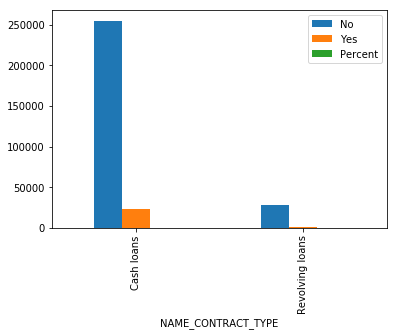

In [64]:
tab = pd.crosstab(index=app_train['NAME_CONTRACT_TYPE'],columns=app_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Revolving loans are just a small fraction from the total number of loan.  Default among revolving loans is lower, as well (8.3% vs 5.5%).

***2. Is there difference in acceptance of application depending on gender?***

                 No    Yes    Percent
CODE_GENDER                          
F            188278  14170   6.999328
M             94404  10655  10.141920
XNA               4      0   0.000000


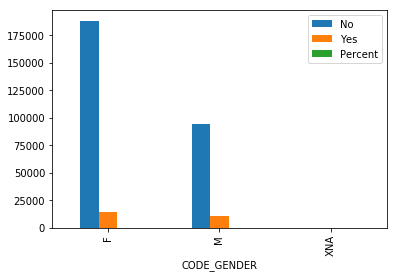

In [56]:
app_bureau_loan_train['CODE_GENDER'].value_counts()

tab = pd.crosstab(index=app_train['CODE_GENDER'],columns=app_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (10.1%), comparing with women (7%)

***3. If a customer owns a car, would it affect payment of loan?***

                  No    Yes   Percent
FLAG_OWN_CAR                         
N             185675  17249  8.500227
Y              97011   7576  7.243730


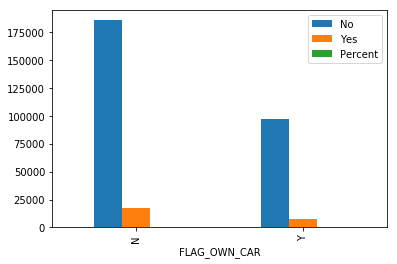

In [57]:
app_bureau_loan_train['FLAG_OWN_CAR'].value_counts()
tab = pd.crosstab(index=app_train['FLAG_OWN_CAR'],columns=app_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

The clients with a car are almost half of the ones that doesn't have one. The clients that owns a car are less likely to not repay loan. Both categories have close not repayment rates (8.5% vs 7.2%)

***4. If a customer owns a real estate, would it affect payment of loan?***

                     No    Yes   Percent
FLAG_OWN_REALTY                         
N                 86357   7842  8.324929
Y                196329  16983  7.961577


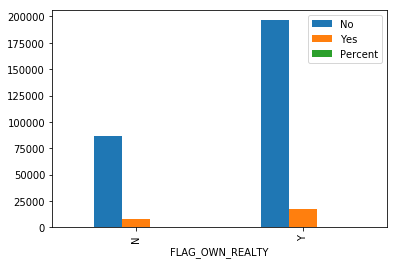

In [65]:
app_bureau_loan_train['FLAG_OWN_REALTY'].value_counts()
tab = pd.crosstab(index=app_train['FLAG_OWN_REALTY'],columns=app_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

The clients that own real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates close to 8%.


***Is family status of client affects payment?***

                          No    Yes   Percent
NAME_FAMILY_STATUS                           
Civil marriage         26814   2961  9.944584
Married               181582  14850  7.559868
Separated              18150   1620  8.194234
Single / not married   40987   4457  9.807675
Unknown                    2      0  0.000000
Widow                  15151    937  5.824217


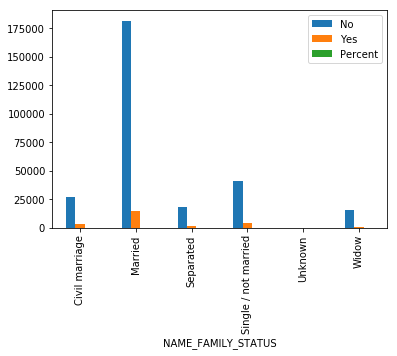

In [70]:
app_bureau_loan_train['NAME_FAMILY_STATUS'].value_counts()
tab = pd.crosstab(index=app_bureau_loan_train['NAME_FAMILY_STATUS'],columns=app_bureau_loan_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest.

***6. Is having children affects payment?***

                  No    Yes     Percent
CNT_CHILDREN                           
0             198762  16609    7.711809
1              55665   5454    8.923575
2              24416   2333    8.721821
3               3359    358    9.631423
4                374     55   12.820513
5                 77      7    8.333333
6                 15      6   28.571429
7                  7      0    0.000000
8                  2      0    0.000000
9                  0      2  100.000000
10                 2      0    0.000000
11                 0      1  100.000000
12                 2      0    0.000000
14                 3      0    0.000000
19                 2      0    0.000000


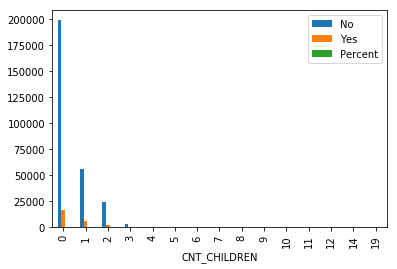

In [71]:
app_bureau_loan_train['CNT_CHILDREN'].value_counts()
tab = pd.crosstab(index=app_bureau_loan_train['CNT_CHILDREN'],columns=app_bureau_loan_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Most of the clients taking a loan have no children. As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%).

***7. Is family size have an affect on repayment?***

                     No    Yes     Percent
CNT_FAM_MEMBERS                           
1.0               62172   5675    8.364408
2.0              146348  12009    7.583498
3.0               47993   4608    8.760290
4.0               22561   2136    8.648824
5.0                3151    327    9.401955
6.0                 353     55   13.480392
7.0                  75      6    7.407407
8.0                  14      6   30.000000
9.0                   6      0    0.000000
10.0                  2      1   33.333333
11.0                  0      1  100.000000
12.0                  2      0    0.000000
13.0                  0      1  100.000000
14.0                  2      0    0.000000
15.0                  1      0    0.000000
16.0                  2      0    0.000000
20.0                  2      0    0.000000


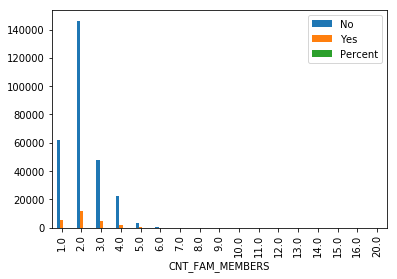

In [73]:
app_bureau_loan_train['CNT_FAM_MEMBERS'].value_counts()
tab = pd.crosstab(index=app_bureau_loan_train['CNT_FAM_MEMBERS'],columns=app_bureau_loan_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4. As for repayment, clients with up until 5 members is below 10%. Clients with family size of 11 and 13 have 100% not repayment rate. Clients with families size of 10 or 8 members have  not repayment rate over 30%.

***8. Does income type have an affect on repayment?***

                          No    Yes    Percent
NAME_INCOME_TYPE                              
Businessman               10      0   0.000000
Commercial associate   66257   5360   7.484257
Maternity leave            3      2  40.000000
Pensioner              52380   2982   5.386366
State servant          20454   1249   5.754965
Student                   18      0   0.000000
Unemployed                14      8  36.363636
Working               143550  15224   9.588472


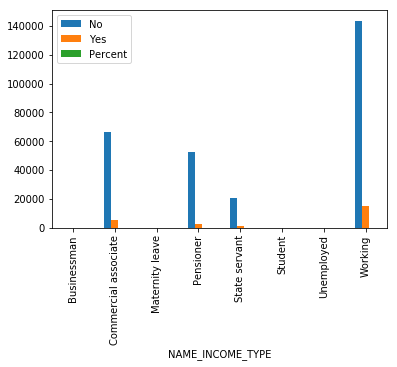

In [75]:
app_bureau_loan_train['NAME_INCOME_TYPE'].value_counts()
tab = pd.crosstab(index=app_bureau_loan_train['NAME_INCOME_TYPE'],columns=app_bureau_loan_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Most of applicants have Working job status, followed by Commercial associate, Pensioner and State servant. The applicants with the type of income Maternity and Unemployed have highest level of default. The restare under the average of 10% not paying loans.

***9. Does the occupation has an affect on repayment?***

                          No   Yes    Percent
OCCUPATION_TYPE                              
Accountants             9339   474   4.830327
Cleaning staff          4206   447   9.606705
Cooking staff           5325   621  10.443996
Core staff             25832  1738   6.303954
Drivers                16496  2107  11.326130
HR staff                 527    36   6.394316
High skill tech staff  10679   701   6.159930
IT staff                 492    34   6.463878
Laborers               49348  5838  10.578770
Low-skill Laborers      1734   359  17.152413
Managers               20043  1328   6.214028
Medicine staff          7965   572   6.700246
Private service staff   2477   175   6.598793
Realty agents            692    59   7.856192
Sales staff            29010  3092   9.631799
Secretaries             1213    92   7.049808
Security staff          5999   722  10.742449
Waiters/barmen staff    1196   152  11.275964


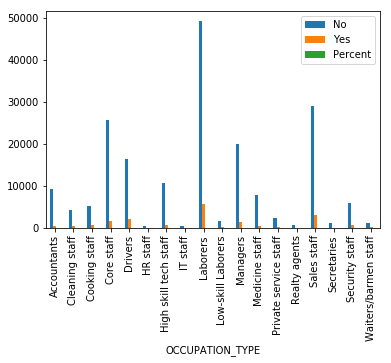

In [77]:
app_bureau_loan_train['OCCUPATION_TYPE'].value_counts()
tab = pd.crosstab(index=app_bureau_loan_train['OCCUPATION_TYPE'],columns=app_bureau_loan_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Most of the loans are taken by laborers, Sales staff. IT staff take the lowest amount of loans. Low-skill Laborers have the highest default rate (above 17%), followed by Drivers, Waiters/Barmen, Security staff, Laborers and Cooking staff.

***10. Does the organization type has an affect on repayment?***

                           No   Yes    Percent
ORGANIZATION_TYPE                             
Advertising               394    35   8.158508
Agriculture              2197   257  10.472698
Bank                     2377   130   5.185481
Business Entity Type 1   5497   487   8.138369
Business Entity Type 2   9653   900   8.528381
Business Entity Type 3  61669  6323   9.299623
Cleaning                  231    29  11.153846
Construction             5936   785  11.679810
Culture                   358    21   5.540897
Electricity               887    63   6.631579
Emergency                 520    40   7.142857
Government               9678   726   6.978085
Hotel                     904    62   6.418219
Housing                  2723   235   7.944557
Industry: type 1          924   115  11.068335
Industry: type 10         102     7   6.422018
Industry: type 11        2470   234   8.653846
Industry: type 12         355    14   3.794038
Industry: type 13          58     9  13.432836
Industry: typ

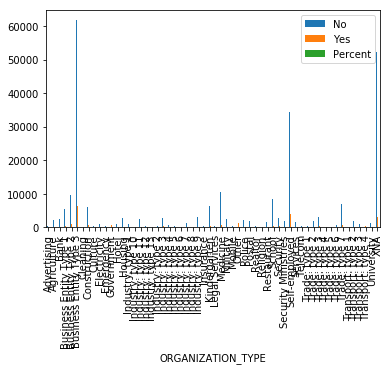

In [80]:
app_bureau_loan_train['ORGANIZATION_TYPE'].value_counts()
tab = pd.crosstab(index=app_bureau_loan_train['ORGANIZATION_TYPE'],columns=app_bureau_loan_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).

***11. How the education of client affects repayment rate?***

                                   No    Yes    Percent
NAME_EDUCATION_TYPE                                    
Academic degree                   161      3   1.829268
Higher education                70854   4009   5.355115
Incomplete higher                9405    872   8.484966
Lower secondary                  3399    417  10.927673
Secondary / secondary special  198867  19524   8.939929


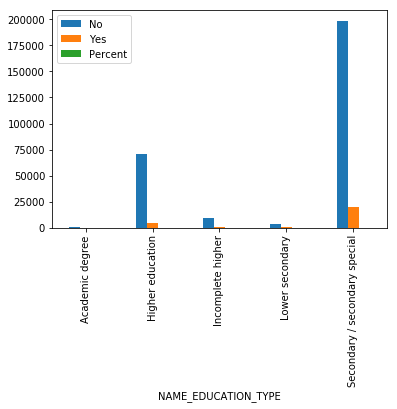

In [81]:
app_bureau_loan_train['NAME_EDUCATION_TYPE'].value_counts()
tab = pd.crosstab(index=app_bureau_loan_train['NAME_EDUCATION_TYPE'],columns=app_bureau_loan_train['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

+ **Result Interpretation:**

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. The Lower secondary category have the highest repayment rate (11%). The people with Academic degree have less than 2% not repayment rate.

** Histogram Analysis**

***1- Total Income Distribution***

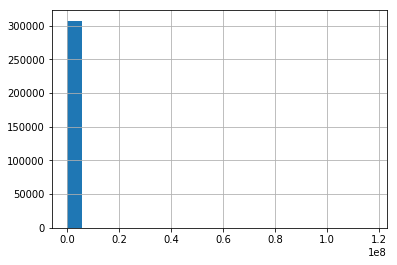

In [84]:
app_bureau_loan_train['AMT_INCOME_TOTAL'].hist(bins=20)
plt.show()

*Graph is not normal, lets do log transformation and check.*

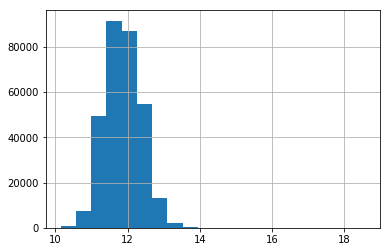

In [89]:
np.log(app_bureau_loan_train['AMT_INCOME_TOTAL'] + 1).hist(bins=20)
plt.show()

***2- Credit Distribution***

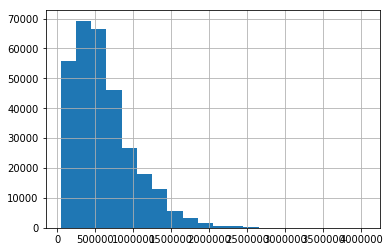

In [90]:
app_bureau_loan_train['AMT_CREDIT'].hist(bins=20)
plt.show()

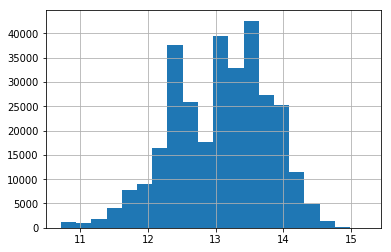

In [92]:
np.log(app_bureau_loan_train['AMT_CREDIT'] + 1).hist(bins=20)
plt.show()

***3- Annuity Distribution***

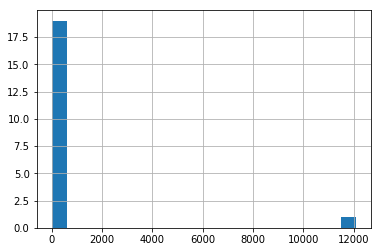

In [93]:
app_bureau_loan_train['AMT_ANNUITY'].hist(bins=20)
plt.show()

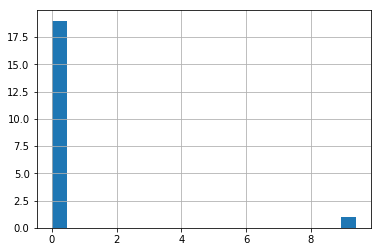

In [95]:
np.log(app_bureau_loan_train['AMT_ANNUITY'] + 1).hist(bins=20)
plt.show()

***4- Goods Price Distribution***

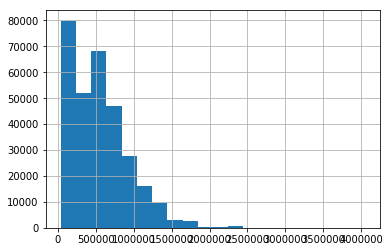

In [97]:
app_bureau_loan_train['AMT_GOODS_PRICE'].hist(bins=20)
plt.show()

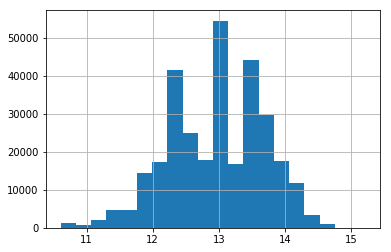

In [98]:
np.log(app_bureau_loan_train['AMT_GOODS_PRICE'] + 1).hist(bins=20)
plt.show()

***5.Days from birth distribution***

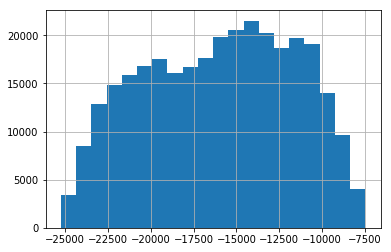

In [99]:
app_bureau_loan_train['DAYS_BIRTH'].hist(bins=20)
plt.show()

***6.Days employed distribution***

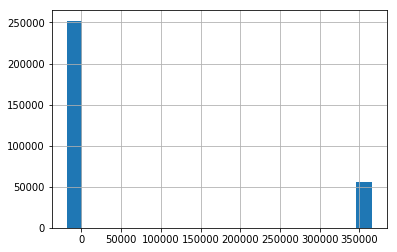

In [101]:
app_bureau_loan_train['DAYS_EMPLOYED'].hist(bins=20)
plt.show()

**Results Interpretation:**

AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITTY, AMT_GOODS_PRICE are not normal distrbiution, but with log transformation they become close to normal.
